In [1]:
import pandas as pd
import seaborn as sns
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
model_path = '../pickle/LogisticRegression/mistral_model.pkl'

In [3]:
data = pd.read_csv('../../preprocessing/StorePreprocessed/Mistralcsv.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size=0.2, random_state=42, stratify=data["label"])


In [5]:
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(4, 4), max_features=11000)  # dynamic range of features

In [6]:
# Remove NaN values from the split data
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [7]:
#define C-values
param_grid_lr = {
    'C': [6.0, 2.0, 1.0, 0.95, 0.9, 0.8]
}

In [8]:
lr = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)

In [9]:
if os.path.exists(model_path):

    with open(model_path, 'rb') as file:
        lr_best = pickle.load(file)
else:
    grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
    grid_lr.fit(X_train, y_train)
    lr_best = grid_lr.best_estimator_
y_pred_lr = lr_best.predict(X_test)

In [ ]:
with open(model_path, 'wb') as file:
    pickle.dump(lr_best, file)

In [10]:
# Evaluate Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2000
           1       0.98      0.97      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

Logistic Regression Accuracy: 0.97525


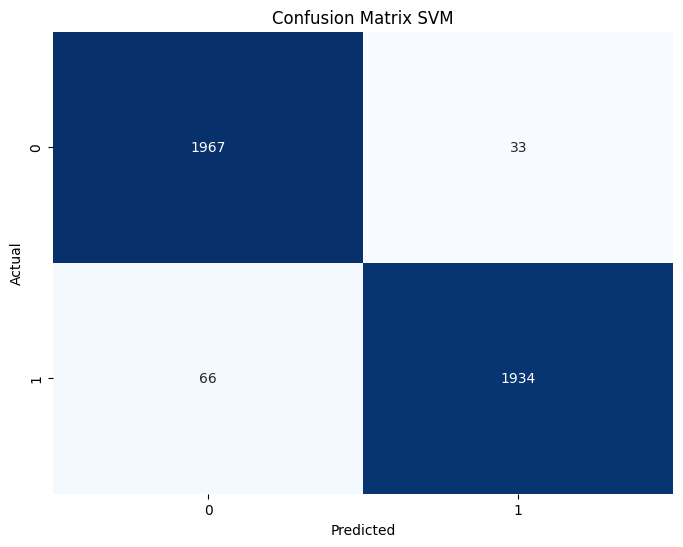

In [11]:
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../../evaluation/Mistral_Evaluation/Confusion_Matrix_LR.png')
plt.show()